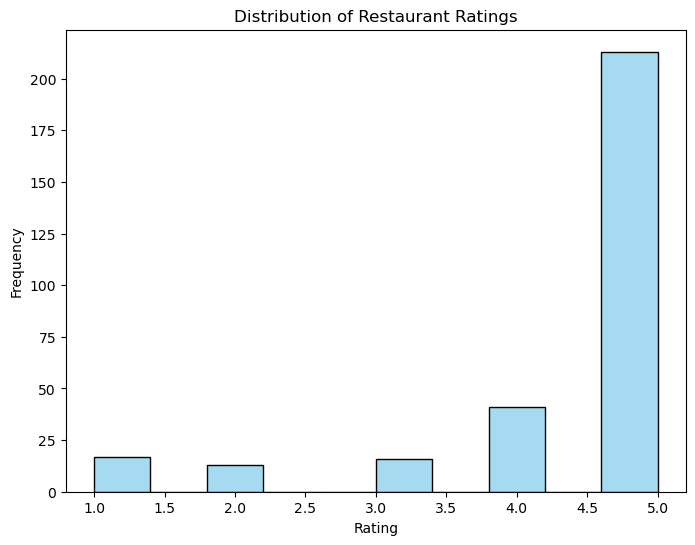

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Visualize the distribution of ratings using histograms or bar charts.

#Load Data
csv_file = '../data/cleaned_restaurant_reviews.csv'
df = pd.read_csv(csv_file)

plt.figure(figsize=(8,6))
sns.histplot(df['cleaned_rating'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

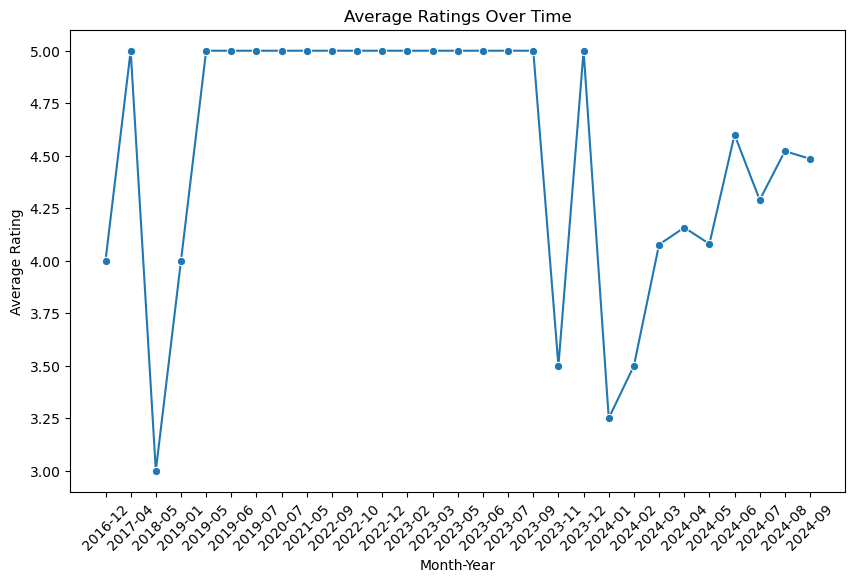

In [2]:
#Generate time-series charts showing how restaurant reviews and ratings have changed over time.

# Ensure 'standardized_date' is in datetime format
df['standardized_date'] = pd.to_datetime(df['standardized_date'], errors='coerce')

# Create a 'month_year' column
df['month_year'] = df['standardized_date'].dt.to_period('M')

# Group by 'month_year' and calculate the mean rating
monthly_ratings = df.groupby('month_year').agg({'cleaned_rating': 'mean'}).reset_index()

# Convert 'month_year' to string for plotting
monthly_ratings['month_year'] = monthly_ratings['month_year'].astype(str)

# Plot the time series
plt.figure(figsize=(10,6))
sns.lineplot(x='month_year', y='cleaned_rating', data=monthly_ratings, marker='o')
plt.xticks(rotation=45)
plt.title('Average Ratings Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Rating')
plt.show()



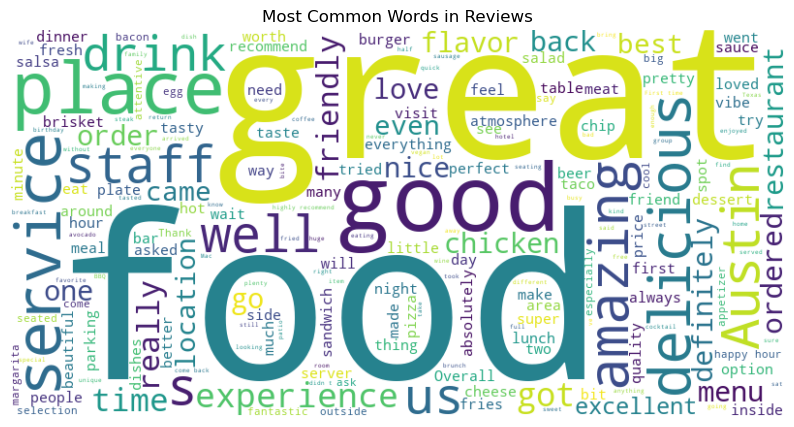

In [6]:
# Create word clouds or frequency charts of commonly used words in reviews to identify key themes.
from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = ' '.join(df['Review Text'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()



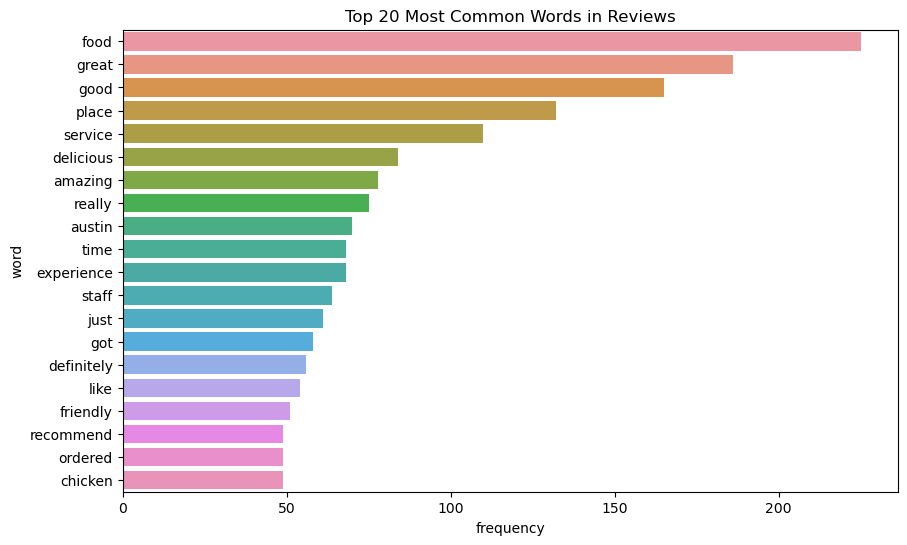

In [7]:
#Most Common words horizontal bar chart.

from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review Text'].astype(str))

# Sum the frequencies of each word
word_freq = X.sum(axis=0).A1
word_freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': word_freq})

# Sort and display top 20 words
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).head(20)

# Plot the frequency chart
plt.figure(figsize=(10,6))
sns.barplot(x='frequency', y='word', data=word_freq_df)
plt.title('Top 20 Most Common Words in Reviews')
plt.show()
